<a href="https://colab.research.google.com/github/alyfeteha/Machine-learning/blob/main/ImageSeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.io import imread
from PIL import Image
import os
import numpy as np
import math
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
import random
from sklearn.metrics import f1_score
from scipy.spatial import distance
from scipy.stats import entropy
import sys
from sklearn.cluster import SpectralClustering


In [ ]:
#image size 481x321
data = []
groundTruthData = []
def scan_folder(parent, format):
  global data
  # iterate over all the files in directory 'parent'
  for file_name in sorted(os.listdir(parent)):
    if file_name.endswith(format) and format == '.jpg':
        # if it's a txt file, print its name (or do whatever you want)
      file_path = parent + '/' + file_name
      im = Image.open(file_path)
      data.append(im)
    elif file_name.endswith(format) and format == '.mat':
      file_path = parent + '/' + file_name
      im = loadmat(file_path)
      groundTruthData.append(im)

    else:
      current_path = "".join((parent, "/", file_name))
      if os.path.isdir(current_path):
        # if we're checking a sub-directory, recursively call this method
        scan_folder(current_path, format)

scan_folder('drive/MyDrive/PR assignment 2/BSR/BSDS500/data/images/train','.jpg')
scan_folder('drive/MyDrive/PR assignment 2/BSR/BSDS500/data/groundTruth/train','.mat')

In [ ]:
if __name__ == "__main__":
  #displayIMG(0)
  pass


Image:



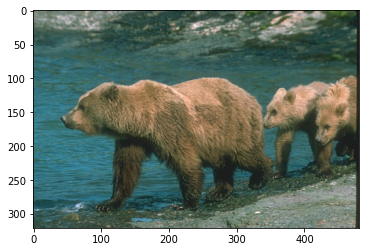

Ground truth images:



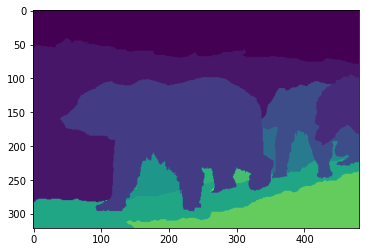

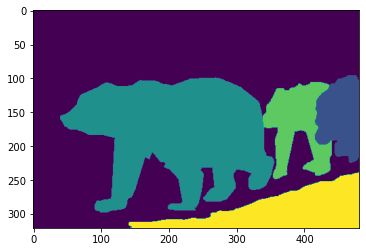

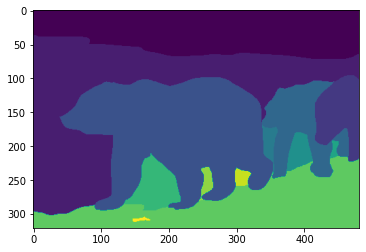

In [ ]:
def displayIMG(index):
  print("Image:\n")
  imgplot = plt.imshow(data[index])
  plt.show()
  print("Ground truth images:\n")
  for i in range(3):    #assume 3 ground truth images
    #print(groundTruthData[index]['groundTruth'][0][i][0][0][0].max())
    imgplot = plt.imshow(groundTruthData[index]['groundTruth'][0][i][0][0][0])
    plt.show()

displayIMG(0)

In [ ]:

def f_measures(image, index_of_image, sum_f_score, k_clusters):
  #print( groundTruthData[index_of_image]['groundTruth'][0][0][0][0][0].shape,image.shape )
  for i in range(3):
    f_score = f1_score(np.array(groundTruthData[index_of_image]['groundTruth'][0][i][0][0][0]).flatten(), np.array(image).flatten(), average='weighted')
    sum_f_score += f_score
    print("f Score for ground truth number {} for {} clusters for image number {} is {} ".format(i, k_clusters,index_of_image, f_score ))
  return sum_f_score

def cond_entropy(k, image, index_of_image):
  totalEntropy= np.zeros(3)  #assume 3 ground images
  flattenedImage=np.array(image).flatten()
  counterClusters=np.zeros(k)     #number of pixels in each k clusters
  entropy=np.zeros(k)   #H(T/Ck)
  for i in range(len(flattenedImage)):
      counterClusters[flattenedImage[i]]+=1    
  for x in range(3):  #iterate on 3 ground images
    entropy=np.zeros(k)
    flattenedGroundTruth=np.array(groundTruthData[index_of_image]['groundTruth'][0][x][0][0][0]).flatten()
    max_flatten_ground_truth_data_value = np.amax(flattenedGroundTruth) + 1
    #if max_flatten_ground_truth_data_value < k:
      #max_flatten_ground_truth_data_value=k
    #counterCommon=np.zeros(max_flatten_ground_truth_data_value+1)
    for j in range(k):  #compute entropy of each cluster
      counterCommon=np.zeros(max_flatten_ground_truth_data_value)
      for i in range(len(flattenedImage)):
        if flattenedImage[i]==j:
            counterCommon[flattenedGroundTruth[i]]+=1
      for z in range(max_flatten_ground_truth_data_value): #try
        if counterCommon[z] != 0: #ignore at zero
          entropy[j]+=(-counterCommon[z]/counterClusters[j])*math.log((counterCommon[z]/counterClusters[j])) #H(T/Cj)
    for j in range(k):
      #print("Entropy for image number {} using {} clusters for ground truth number {} is = {} ".format(index_of_image, k, x, entropy[j] ))
      totalEntropy[x]+=(counterClusters[j]/(len(flattenedImage)))*entropy[j]
      #print(totalEntropy[x]/3)
    print("Total entropy for image number {} using {} clusters for ground truth number {} is = {}".format(index_of_image, k ,x , totalEntropy[x]))
  print("Avg Entropy for image number {} using {} clusters is = {}".format(index_of_image, k, np.sum(totalEntropy)/(3)))  
        
  

  


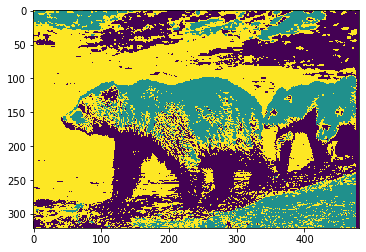

Total entropy for image number 0 using 3 clusters for ground truth number 0 is = 1.6235204660144409
Total entropy for image number 0 using 3 clusters for ground truth number 1 is = 0.9944745384410605
Total entropy for image number 0 using 3 clusters for ground truth number 2 is = 1.5973364067556444
Avg Entropy for image number 0 using 3 clusters is = 1.4051104704037154
f Score for ground truth number 0 for 3 clusters for image number 0 is 0.19493713279775243 
f Score for ground truth number 1 for 3 clusters for image number 0 is 0.05983478021765673 
f Score for ground truth number 2 for 3 clusters for image number 0 is 0.20601632184980895 


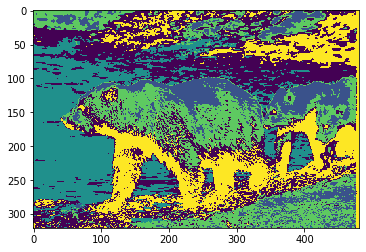

Total entropy for image number 0 using 5 clusters for ground truth number 0 is = 1.481765878078588
Total entropy for image number 0 using 5 clusters for ground truth number 1 is = 0.9006626534198771
Total entropy for image number 0 using 5 clusters for ground truth number 2 is = 1.4673618807942927
Avg Entropy for image number 0 using 5 clusters is = 1.2832634707642525
f Score for ground truth number 0 for 5 clusters for image number 0 is 0.2758855561251035 
f Score for ground truth number 1 for 5 clusters for image number 0 is 0.13629018885113162 
f Score for ground truth number 2 for 5 clusters for image number 0 is 0.2870404465318109 


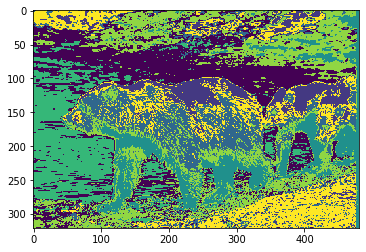

Total entropy for image number 0 using 7 clusters for ground truth number 0 is = 1.3698874666981924
Total entropy for image number 0 using 7 clusters for ground truth number 1 is = 0.806232078072124
Total entropy for image number 0 using 7 clusters for ground truth number 2 is = 1.3611905740656387
Avg Entropy for image number 0 using 7 clusters is = 1.1791033729453184
f Score for ground truth number 0 for 7 clusters for image number 0 is 0.023794906212592802 
f Score for ground truth number 1 for 7 clusters for image number 0 is 0.1036077482564358 
f Score for ground truth number 2 for 7 clusters for image number 0 is 0.026866619526203846 


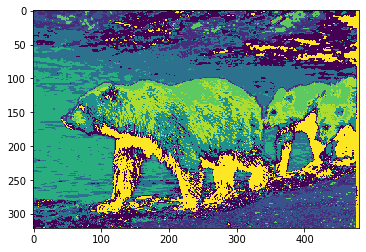

Total entropy for image number 0 using 9 clusters for ground truth number 0 is = 1.2094266423416387
Total entropy for image number 0 using 9 clusters for ground truth number 1 is = 0.6626770466180804
Total entropy for image number 0 using 9 clusters for ground truth number 2 is = 1.2037564290318703
Avg Entropy for image number 0 using 9 clusters is = 1.0252867059971964
f Score for ground truth number 0 for 9 clusters for image number 0 is 0.15582859905974014 
f Score for ground truth number 1 for 9 clusters for image number 0 is 0.0859351699457216 
f Score for ground truth number 2 for 9 clusters for image number 0 is 0.1562367733124722 


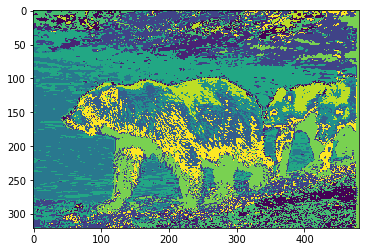

Total entropy for image number 0 using 11 clusters for ground truth number 0 is = 1.1574377444092887
Total entropy for image number 0 using 11 clusters for ground truth number 1 is = 0.6279278238940699
Total entropy for image number 0 using 11 clusters for ground truth number 2 is = 1.1498257513178942
Avg Entropy for image number 0 using 11 clusters is = 0.9783971065404176
f Score for ground truth number 0 for 11 clusters for image number 0 is 0.08665645561824563 
f Score for ground truth number 1 for 11 clusters for image number 0 is 0.19024398088410174 
f Score for ground truth number 2 for 11 clusters for image number 0 is 0.10903506035133781 
average fscore for 3 ground truths and 5 clusters for image 0 is 0.13988064930267438
Average fscore for 1 images using 3 ground truths and 5 clusters is 0.13988064930267438


In [ ]:
#img = kmeans_implemented(3,np.array(data[0]))
def kmeans (k, data):
  total_f_score = 0
  sum_f_score = 0
  for i in range(len(data)):
      for j in k:
        x = np.array(data[i]).shape[0]
        y = np.array(data[i]).shape[1]
        kmeans = KMeans(n_clusters=j, random_state=0).fit(np.array(data[i]).reshape(x*y,3))
        image = kmeans.labels_.reshape(x,y)
        plt.imshow(image, interpolation='nearest')
        plt.show()
        cond_entropy(j, image, i)
        sum_f_score = f_measures(image, i, sum_f_score, j)
      total_f_score += sum_f_score
      print("average fscore for 3 ground truths and {} clusters for image {} is {}".format(len(k), i, (sum_f_score/(len(k)*3)) ))
      sum_f_score = 0
  print("Average fscore for {} images using 3 ground truths and {} clusters is {}".format(len(data), len(k), (total_f_score/(len(k)*len(data)*3)) ))
      


k = [3, 5, 7, 9, 11]
kmeans(k, data[0:1])

In [ ]:
def kmeans_implemented(k, picture):
    centroids = []
    data_clusters_array = np.zeros(shape=(picture.shape[0],picture.shape[1]))
    centroids_prev = np.array(centroids.copy())
    for i in range(k):
        rand_x = random.randint(0, picture.shape[0])
        rand_y = random.randint(0, picture.shape[1])
        centroids.append(picture[rand_x,rand_y])
    centroids = np.array(centroids)
    #print(centroids)
    while not np.array_equal(centroids, centroids_prev):
        centroids_prev = np.array(centroids.copy())
        sum1 = 0
        sum2 = 0
        sum3 = 0
        for i in range(picture.shape[0]):
            for j in range(picture.shape[1]):
                min = sys.maxsize
                for z in range(0,k):
                    curr = np.linalg.norm(picture[i, j]-centroids[z])
                    if curr < min:
                        min = curr
                        data_clusters_array[i, j] = z
                if data_clusters_array[i, j] ==0:
                  sum1+=1
                elif data_clusters_array[i, j] ==1:
                  sum2+=1
                elif data_clusters_array[i, j] ==2:
                  sum3+=1
        #print(sum1,sum2,sum3)
        #print(data_clusters_array)
        for f in range(k):
            sum_means = [0, 0, 0]
            counter = 1
            for i in range(data_clusters_array.shape[0]):
                for j in range(data_clusters_array.shape[1]):
                    if data_clusters_array[i, j] == f:
                        counter += 1
                        sum_means[0] += picture[i, j, 0]  #R
                        sum_means[1] += picture[i, j, 1]  #G
                        sum_means[2] += picture[i, j, 2]  #B
            #print('hi',sum_means[0],sum_means[1],sum_means[2])
            centroids[f,0] = sum_means[0] / counter
            centroids[f,1] = sum_means[1] / counter
            centroids[f,2] = sum_means[2] / counter
        #print(centroids)  
    return data_clusters_array

#print(kmeans_implemented(3,np.array(data[0])))

Image:



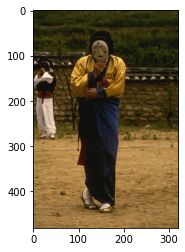

Ground truth images:



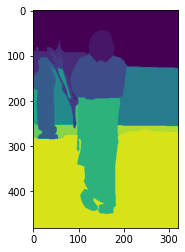

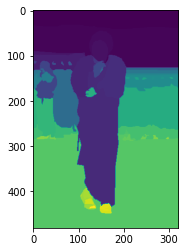

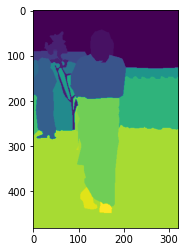

Segmentation using kmeans at k = 5:



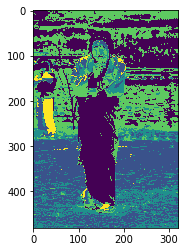

Segmentation using normalized-cut for 5-NN graph at k=5:



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
def big_picture():
  for _ in range(5):
    i = random.randint(0, len(data))
    displayIMG(i)
    x = np.array(data[i]).shape[0]
    y = np.array(data[i]).shape[1]
    kmeans = KMeans(n_clusters=5, random_state=0).fit(np.array(data[i]).reshape(x*y,3))
    image = kmeans.labels_.reshape(x,y)
    plt.imshow(image, interpolation='nearest')
    print("Segmentation using kmeans at k = 5:\n")
    plt.show()
    print("Segmentation using normalized-cut for 5-NN graph at k=5:\n")
    clustering = SpectralClustering(n_clusters=5,random_state=0,affinity='nearest_neighbors',n_neighbors=5).fit(np.array(data[i]).reshape(x*y,3))
    print("Clustering labels:",clustering.labels_)
    image = clustering.labels_.reshape(x,y)
    plt.imshow(image, interpolation='nearest')
    plt.show()
  
big_picture()